In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import pathlib
import PIL
import PIL.Image

In [ ]:
!unzip Dataset_Detection_of_Lung_Infection

Archive:  Dataset_Detection_of_Lung_Infection.zip
   creating: data/test/
   creating: data/test/healthy/
  inflating: data/test/healthy/0101.jpeg  
  inflating: data/test/healthy/0102.jpeg  
  inflating: data/test/healthy/0103.jpeg  
  inflating: data/test/healthy/0105.jpeg  
  inflating: data/test/healthy/0106.jpeg  
  inflating: data/test/healthy/0107.jpeg  
  inflating: data/test/healthy/0108.jpeg  
  inflating: data/test/healthy/0109.jpeg  
  inflating: data/test/healthy/0110.jpeg  
  inflating: data/test/healthy/0111.jpeg  
  inflating: data/test/healthy/0112.jpeg  
  inflating: data/test/healthy/0114.jpeg  
  inflating: data/test/healthy/0115.jpeg  
  inflating: data/test/healthy/0116.jpeg  
  inflating: data/test/healthy/0117.jpeg  
  inflating: data/test/healthy/0118.jpeg  
  inflating: data/test/healthy/0119.jpeg  
  inflating: data/test/healthy/0120.jpeg  
  inflating: data/test/healthy/0121.jpeg  
  inflating: data/test/healthy/0122.jpeg  
   creating: data/test/Type 1 dise

In [ ]:
#Count of images in training set
data_dir= 'data/train/'
data_dir = pathlib.Path(data_dir)
l=[]
image_count_healthy = len(list(data_dir.glob('Healthy/*')))
image_count_type_1 = len(list(data_dir.glob('Type 1 disease/*')))
image_count_type_2 = len(list(data_dir.glob('Type 2 disease/*')))
l.append(image_count_healthy)
l.append(image_count_type_1)
l.append(image_count_type_2)
print("The image count of for healthy,Type1 and type 2 disease are respectively",l)

The image count of for healthy,Type1 and type 2 disease are respectively [70, 111, 70]


In [ ]:
#Count of images in test set
data_dir_1='data/test/'
data_dir_1 = pathlib.Path(data_dir_1)
test_count_healthy = len(list(data_dir_1.glob('healthy/*')))
test_count_type_1 = len(list(data_dir_1.glob('Type 1 disease/*')))
test_count_type_2 = len(list(data_dir_1.glob('Type 2 disease/*')))
c=[]
c.append(test_count_healthy)
c.append(test_count_type_1 )
c.append(test_count_type_2 )
print("The image count of for healthy,Type1 and type 2 disease are respectively",c)

The image count of for healthy,Type1 and type 2 disease are respectively [20, 26, 20]


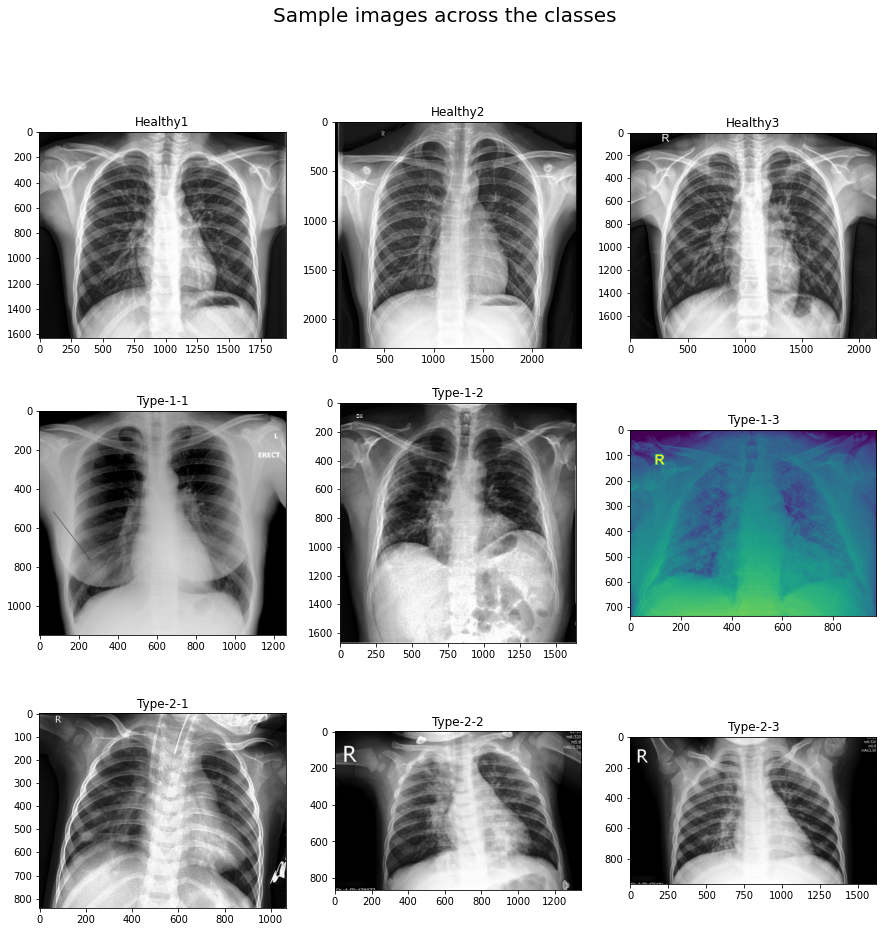

In [ ]:
#Displaying the images in each of the classes in the dataset
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(15, 15))
healthy = list(data_dir.glob('Healthy/*'))
Type_1 = list(data_dir.glob('Type 1 disease/*'))
Type_2 = list(data_dir.glob('Type 2 disease/*'))
for i in range(3):
    plt.subplot(3,3,i+1 )
    img = Image.open(healthy[i])
    plt.title("Healthy"+str(i+1))
    plt.imshow(img)
    plt.subplot(3,3,4+i )
    img1 = Image.open(Type_1[i])
    plt.title("Type-1-"+str(i+1))
    plt.imshow(img1)
    plt.subplot(3,3,7+i )
    plt.title("Type-2-"+str(i+1))
    img2 = Image.open(Type_2[i])
    plt.imshow(img2)
plt.suptitle("Sample images across the classes",fontsize=20)
count_values=l

In [ ]:
#Image-Data geberator can also be used,but for new code tf.keras documentation recommends using tf.keras.utils because image data generator deprecated
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
trainImageData=tf.keras.utils.image_dataset_from_directory("data/train/",labels='inferred',color_mode='rgb'
    ,class_names=["Healthy","Type 1 disease","Type 2 disease"],label_mode="categorical")
testImageData=tf.keras.utils.image_dataset_from_directory("data/test/",labels='inferred',color_mode='rgb'
    ,class_names=["healthy","Type 1 disease","Type 2 disease"],label_mode="categorical")

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


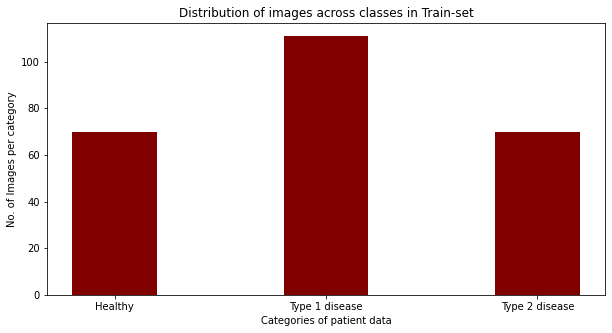

In [ ]:
#Understanding the distribution of images across training set
classes=trainImageData.class_names
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(classes, count_values, color ='maroon',
        width = 0.4)

plt.xlabel("Categories of patient data")
plt.ylabel("No. of Images per category")
plt.title("Distribution of images across classes in Train-set")
plt.show()

In [ ]:
#Performing data augmentation for train data
augmentation_train= tf.keras.models.Sequential([
 tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1),
  tf.keras.layers.Resizing(48,48)
])

In [ ]:
#Resizing and rescaling the test data
Resizing_test=tf.keras.models.Sequential([
     tf.keras.layers.Resizing(48,48),
     tf.keras.layers.Rescaling(scale=1 / 255)
])

In [ ]:
train_ds = trainImageData.map(
  lambda x, y: (augmentation_train(x, training=True), y))
test_ds=testImageData.map(
  lambda x, y: (Resizing_test(x, training=True), y))

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 48, 48, 3)
(32, 3)


In [ ]:
# ARchitect the model
from keras.regularizers import l2
model = tf.keras.models.Sequential()



#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding)
initializer=tf.keras.initializers.GlorotNormal
model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape=(48,48,3), padding='same',kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling
model.add(tf.keras.layers.Conv2D(64 , (3,3) , padding='same',kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) ))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling
model.add(tf.keras.layers.Conv2D(128 , (3,3)  , padding='same',kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 2048, activation="relu",kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu",kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dense(units= 3, activation="softmax"))



In [ ]:
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose = 1,
    mode='min',
    restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 activation_34 (Activation)  (None, 24, 24, 64)      

In [ ]:
!pip install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_addons as tfa
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=10,
                    callbacks=[early_stopping])

Epoch 1/10
8/8 [==============================] - 6s 329ms/step - loss: 100.8157 - accuracy: 0.3705 - val_loss: 32.8337 - val_accuracy: 0.3939
Epoch 2/10
8/8 [==============================] - 6s 347ms/step - loss: 30.8551 - accuracy: 0.5618 - val_loss: 26.3654 - val_accuracy: 0.3939
Epoch 3/10
8/8 [==============================] - 5s 301ms/step - loss: 24.0544 - accuracy: 0.6414 - val_loss: 21.9237 - val_accuracy: 0.3939
Epoch 4/10
8/8 [==============================] - 5s 300ms/step - loss: 19.7063 - accuracy: 0.7211 - val_loss: 18.8639 - val_accuracy: 0.3939
Epoch 5/10
8/8 [==============================] - 5s 308ms/step - loss: 16.5402 - accuracy: 0.6932 - val_loss: 16.6646 - val_accuracy: 0.3939
Epoch 6/10
8/8 [==============================] - 5s 333ms/step - loss: 13.6356 - accuracy: 0.7052 - val_loss: 14.0969 - val_accuracy: 0.3939
Epoch 7/10
8/8 [==============================] - 5s 306ms/step - loss: 10.9133 - accuracy: 0.7769 - val_loss: 11.0625 - val_accuracy: 0.3939
Epoch

In [ ]:
print(model.evaluate(train_ds))
print(model.evaluate(test_ds))

8/8 [==============================] - 5s 233ms/step - loss: 9.7642 - accuracy: 0.5976
[9.76419734954834, 0.5976095795631409]
3/3 [==============================] - 0s 8ms/step - loss: 11.0625 - accuracy: 0.3939
[11.062504768371582, 0.39393940567970276]


In [ ]:
import tensorflow_addons as tfa
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['Precision','recall',tfa.metrics.F1Score(num_classes=3, threshold=0.5)])

Using MobileNet

In [ ]:
#Image-Data geberator can also be used,but for new code tf.keras documentation recommends using tf.keras.utils because image data generator deprecated
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
trainImageData_1=tf.keras.utils.image_dataset_from_directory("data/train/",labels='inferred',color_mode='rgb',image_size=(224,224),class_names=["Healthy","Type 1 disease","Type 2 disease"],label_mode="categorical",seed=1)

testImageData_1=tf.keras.utils.image_dataset_from_directory("data/test/",labels='inferred',color_mode='rgb',image_size=(224,224),
    class_names=["healthy","Type 1 disease","Type 2 disease"],label_mode="categorical",seed=1)


Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
scale_layer = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)

In [ ]:
# Transfer learning using mobile net with pretrained weight,required size is 224*224,so it is used
MobNet = tf.keras.applications.mobilenet.MobileNet(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)

MobNet.trainable = False
#Flatten
avg_pool = tf.keras.layers.GlobalAveragePooling2D()
flatten = tf.keras.layers.Flatten()
Layer0 = tf.keras.layers.Dense(units=1024,activation="relu")
Layer1 =tf.keras.layers.Dropout(0.2)
Layer2 = tf.keras.layers.Dense(units=512,activation="relu")
Layer3 =tf.keras.layers.Dropout(0.2)
Layer4 = tf.keras.layers.Dense(units=256,activation="relu")
Layer5 =tf.keras.layers.Dropout(0.2)
Layer6 = tf.keras.layers.Dense(units=128,activation="relu")
finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [ ]:
MobNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
#Bulding the individual layers of the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = scale_layer(x)
x = MobNet(x, training=False)
x=avg_pool(x)
x=flatten(x)
x = Layer0(x)
x= Layer1(x)
x= Layer2(x)
x= Layer3(x)
x= Layer4(x)
x= Layer5(x)
x= Layer6(x)
outputs = finalLayer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose = 1,
    mode='min',
    restore_best_weights=True)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_25 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_16 (Flatten)        (None, 1024)              0     

In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.9 MB/s 


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes=3, threshold=0.5)])

In [ ]:

history = model.fit(trainImageData_1,
                    validation_data=testImageData_1,
                    epochs=10,
                    callbacks=[early_stopping])

Epoch 1/10
8/8 [==============================] - 4s 148ms/step - loss: 0.9922 - accuracy: 0.5538 - f1_score: 0.4208 - val_loss: 0.7291 - val_accuracy: 0.6364 - val_f1_score: 0.4724
Epoch 2/10
8/8 [==============================] - 4s 141ms/step - loss: 1.0265 - accuracy: 0.5737 - f1_score: 0.4943 - val_loss: 0.6818 - val_accuracy: 0.7424 - val_f1_score: 0.3333
Epoch 3/10
8/8 [==============================] - 4s 142ms/step - loss: 0.6327 - accuracy: 0.6733 - f1_score: 0.5689 - val_loss: 0.6386 - val_accuracy: 0.6818 - val_f1_score: 0.4522
Epoch 4/10
8/8 [==============================] - 4s 143ms/step - loss: 0.5875 - accuracy: 0.7450 - f1_score: 0.6953 - val_loss: 0.6034 - val_accuracy: 0.6970 - val_f1_score: 0.5593
Epoch 5/10
8/8 [==============================] - 4s 136ms/step - loss: 0.6681 - accuracy: 0.7211 - f1_score: 0.6737 - val_loss: 0.7505 - val_accuracy: 0.6667 - val_f1_score: 0.6767
Epoch 6/10
8/8 [==============================] - 4s 142ms/step - loss: 0.6181 - accuracy:

In [ ]:
print(model.evaluate(trainImageData_1))
print(model.evaluate(testImageData_1))

8/8 [==============================] - 4s 53ms/step - loss: 0.3512 - accuracy: 0.9044 - f1_score: 0.8826
[0.3512353003025055, 0.9043824672698975, array([0.8740741 , 0.96069866, 0.8130081 ], dtype=float32)]
3/3 [==============================] - 1s 33ms/step - loss: 0.3971 - accuracy: 0.8485 - f1_score: 0.8148
[0.39706099033355713, 0.8484848737716675, array([0.7567568, 1.       , 0.6875   ], dtype=float32)]


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['Precision','Recall'])

In [ ]:
history = model.fit(trainImageData_1,
                    validation_data=testImageData_1,
                    epochs=10,
                    callbacks=[early_stopping])

Epoch 1/10
8/8 [==============================] - 8s 309ms/step - loss: 2.4837 - precision: 0.3911 - recall: 0.3506 - val_loss: 1.0075 - val_precision: 1.0000 - val_recall: 0.0455
Epoch 2/10
8/8 [==============================] - 4s 146ms/step - loss: 0.8574 - precision: 0.7083 - recall: 0.4064 - val_loss: 0.8366 - val_precision: 0.5690 - val_recall: 0.5000
Epoch 3/10
8/8 [==============================] - 4s 143ms/step - loss: 0.7005 - precision: 0.7143 - recall: 0.5777 - val_loss: 0.8252 - val_precision: 0.5738 - val_recall: 0.5303
Epoch 4/10
8/8 [==============================] - 4s 141ms/step - loss: 0.6732 - precision: 0.7897 - recall: 0.6733 - val_loss: 0.9252 - val_precision: 0.6897 - val_recall: 0.6061
Epoch 5/10
8/8 [==============================] - 4s 148ms/step - loss: 0.7665 - precision: 0.7261 - recall: 0.6653 - val_loss: 0.5737 - val_precision: 0.6833 - val_recall: 0.6212
Epoch 6/10
8/8 [==============================] - 4s 143ms/step - loss: 0.4971 - precision: 0.7817 -

**Using Densenet121**

In [ ]:
#Image-Data generator can also be used,but for new code tf.keras documentation recommends using tf.keras.utils because image data generator deprecated
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#Generating train and test data of colored images
trainImageData_2=tf.keras.utils.image_dataset_from_directory("data/train/",labels='inferred',color_mode='rgb',image_size=(224,224),batch_size=7
    ,class_names=["Healthy","Type 1 disease","Type 2 disease"],label_mode="categorical")
testImageData_2=tf.keras.utils.image_dataset_from_directory("data/test/",labels='inferred',color_mode='rgb',image_size=(224,224),batch_size=7
    ,class_names=["healthy","Type 1 disease","Type 2 disease"],label_mode="categorical")


Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
#Generating train and test data of grayscale images
trainImageData_2_gray=tf.keras.utils.image_dataset_from_directory("data/train/",labels='inferred',color_mode='grayscale',image_size=(224,224),batch_size=7
    ,class_names=["Healthy","Type 1 disease","Type 2 disease"],label_mode="categorical")
testImageData_2_gray=tf.keras.utils.image_dataset_from_directory("data/test/",labels='inferred',color_mode='grayscale',image_size=(224,224),batch_size=7
    ,class_names=["healthy","Type 1 disease","Type 2 disease"],label_mode="categorical")

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
# Transfer learning using densenet121 without freezing top layers
densene = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights=None,
                                        pooling=max,
                                        include_top=False)


#Flatten

flatten = tf.keras.layers.Flatten()


Layer0 = tf.keras.layers.Dense(units=1024,activation="relu")
Layer1 =tf.keras.layers.Dropout(0.2)
Layer2 = tf.keras.layers.Dense(units=256,activation="relu")


# Output Layer
finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [ ]:
rescale_data = tf.keras.layers.Rescaling(scale=1 / 255)

In [ ]:

model_1 = tf.keras.models.Sequential([rescale_data,
                                    densene,
                                    flatten,
                                    Layer0,
                                    Layer1,
                                    Layer2,
                                   finalLayer
])

In [ ]:
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=6,
    verbose = 1,
    mode='min',
    restore_best_weights=True)

In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tfa.metrics.F1Score(num_classes=3, threshold=0.5)])

In [ ]:
model_1.fit(trainImageData_2,
          validation_data=testImageData_2,
          epochs=15,
          callbacks=[early_stopping])

Epoch 1/15
51/51 [==============================] - 20s 170ms/step - loss: 16.6314 - accuracy: 0.5339 - f1_score: 0.5213 - val_loss: 1.9095 - val_accuracy: 0.3939 - val_f1_score: 0.1884
Epoch 2/15
51/51 [==============================] - 6s 117ms/step - loss: 3.2381 - accuracy: 0.6932 - f1_score: 0.6644 - val_loss: 88.2300 - val_accuracy: 0.4091 - val_f1_score: 0.3127
Epoch 3/15
51/51 [==============================] - 7s 120ms/step - loss: 0.9724 - accuracy: 0.8167 - f1_score: 0.8099 - val_loss: 4.7221 - val_accuracy: 0.3939 - val_f1_score: 0.1884
Epoch 4/15
51/51 [==============================] - 6s 118ms/step - loss: 0.5587 - accuracy: 0.8486 - f1_score: 0.8263 - val_loss: 2.2053 - val_accuracy: 0.5606 - val_f1_score: 0.4346
Epoch 5/15
51/51 [==============================] - 7s 124ms/step - loss: 0.7840 - accuracy: 0.8526 - f1_score: 0.8387 - val_loss: 1.6710 - val_accuracy: 0.6364 - val_f1_score: 0.5461
Epoch 6/15
51/51 [==============================] - 6s 121ms/step - loss: 0.3

**Transfer learning using Densenet121 with pre-trained weights freezing top layers**

In [ ]:
# Transfer learning using Densenet net with pre-trained weights/freezing top layers
densene = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)


#Freezing the upper layers
densene.trainable=False

flatten = tf.keras.layers.Flatten()


Layer0 = tf.keras.layers.Dense(units=1024,activation="relu")
Layer1 =tf.keras.layers.Dropout(0.2)
Layer2 = tf.keras.layers.Dense(units=256,activation="relu")


# Output Layer
finalLayer = tf.keras.layers.Dense(3,activation="softmax")


In [ ]:

model_1 = tf.keras.models.Sequential([rescale_data,
                                    densene,
                                    flatten,
                                    Layer0,
                                    Layer1,
                                    Layer2,
                                   finalLayer
])

In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tfa.metrics.F1Score(num_classes=3, threshold=0.5)])

In [ ]:
model_1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     multiple                  0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_18 (Flatten)        (None, 50176)             0         
                                                                 
 dense_52 (Dense)            (None, 1024)              51381248  
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_53 (Dense)            (None, 256)               262400    
                                                                 
 dense_54 (Dense)            (None, 3)               

In [ ]:
model_1.fit(trainImageData_2,
          validation_data=testImageData_2,
          epochs=15,
          callbacks=[early_stopping])

Epoch 1/15
36/36 [==============================] - 38s 167ms/step - loss: 15.1483 - accuracy: 0.6414 - f1_score: 0.6242 - val_loss: 7.6078 - val_accuracy: 0.7273 - val_f1_score: 0.7183
Epoch 2/15
36/36 [==============================] - 5s 110ms/step - loss: 3.2185 - accuracy: 0.8845 - f1_score: 0.8789 - val_loss: 1.2017 - val_accuracy: 0.9242 - val_f1_score: 0.9169
Epoch 3/15
36/36 [==============================] - 4s 103ms/step - loss: 0.6293 - accuracy: 0.9562 - f1_score: 0.9531 - val_loss: 1.9146 - val_accuracy: 0.8939 - val_f1_score: 0.8796
Epoch 4/15
36/36 [==============================] - 5s 110ms/step - loss: 0.6402 - accuracy: 0.9681 - f1_score: 0.9635 - val_loss: 0.7161 - val_accuracy: 0.9091 - val_f1_score: 0.9037
Epoch 5/15
36/36 [==============================] - 5s 110ms/step - loss: 0.3553 - accuracy: 0.9801 - f1_score: 0.9771 - val_loss: 0.3901 - val_accuracy: 0.9394 - val_f1_score: 0.9349
Epoch 6/15
36/36 [==============================] - 4s 101ms/step - loss: 0.25

Inference: From the results of the models above,it is found that Densenet performs the best in the given dataset.It is capable of achieving a very high accuracy and F1 score.The performance is best when used with pretrained weights with additional layers.Next in performance comes the architecture of Mobilenet,it also has a good performance when used with pre-trained weights from image-net and then additional layers at the end.However a simple CNN model built initially with simple layers for specified input size of 48*48 is found to have poor performance.It was found to overfit severely.The dropouts and regularizers used are for generalization and to reduce overfittling.Despite this the tet performance still does not improve.

This indicates that sophisticated architecture and probably more data wiuld be required to optimize the weights for better performance.When transfer learning is used for this dataset,excellent performance is observed.